In [43]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image
from scipy.fftpack import dct, idct

Image dimensions: (450, 620, 3)
<class 'numpy.ndarray'>


(-0.5, 619.5, 449.5, -0.5)

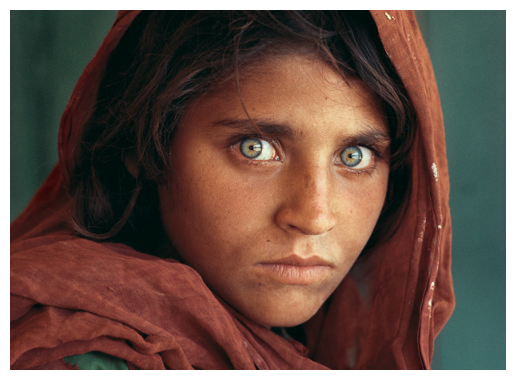

In [44]:
img = imread('afghan.jpg')

print('Image dimensions:', img.shape)
print(type(img))
plt.figure()
plt.imshow(img)
plt.axis('off')

In [45]:
def save_compressed_image (image, image_path = 'compressed_afghan.jpg'):
    img_to_save = Image.fromarray(np.uint8(image))
    img_to_save.save(image_path)    

In [46]:
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')
               
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

def dct_compression_rgb(img, threshold=0.1):
    compressed_channels = []
    for i in range(3):
        channel_dct = dct2(img[:, :, i])
        channel_sort = np.sort(np.abs(channel_dct.reshape(-1)))

        thresh = channel_sort[int(np.floor((1-threshold) * len(channel_sort)))]
        ind = np.abs(channel_dct) > thresh
        channel_compressed = channel_dct * ind
        channel_reconstructed = idct2(channel_compressed).real

        compressed_channels.append(channel_reconstructed)
    compressed_image = np.stack(compressed_channels, axis=-1)
    compressed_image = np.clip(compressed_image, 0, 255)
    
    return compressed_image


In [47]:
def fft_compression_rgb(img, threshold=0.1):
    compressed_channels = []
    for i in range(3):
        channel_dct = np.fft.fft2(img[:, :, i])
        channel_sort = np.sort(np.abs(channel_dct.reshape(-1)))

        thresh = channel_sort[int(np.floor((1-threshold) * len(channel_sort)))]
        ind = np.abs(channel_dct) > thresh
        channel_compressed = channel_dct * ind
        channel_reconstructed = np.fft.ifft2(channel_compressed).real

        compressed_channels.append(channel_reconstructed)
    compressed_image = np.stack(compressed_channels, axis=-1)
    compressed_image = np.clip(compressed_image, 0, 255)
    
    return compressed_image

In [48]:
def wavelet_compression_rgb(img, threshold = 0.1):
    compressed_channels = []
    n = 4
    wavelet_function = 'haar'
    for i in range(3):
        coeffs = pywt.wavedec2(img[:, :, i],wavelet=wavelet_function, level=n)
        
        coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
        Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

        thresh = Csort[int(np.floor((1-threshold) * len(Csort)))]
        ind = np.abs(coeff_arr) > thresh
        Cfilt = coeff_arr * ind
        
        coeffs_filt = pywt.array_to_coeffs(Cfilt, coeff_slices, output_format='wavedec2')
        
        channel_reconstructed = pywt.waverec2(coeffs_filt, wavelet = wavelet_function)

        compressed_channels.append(channel_reconstructed)
    compressed_image = np.stack(compressed_channels, axis=-1)
    compressed_image = np.clip(compressed_image, 0, 255)
    
    return compressed_image

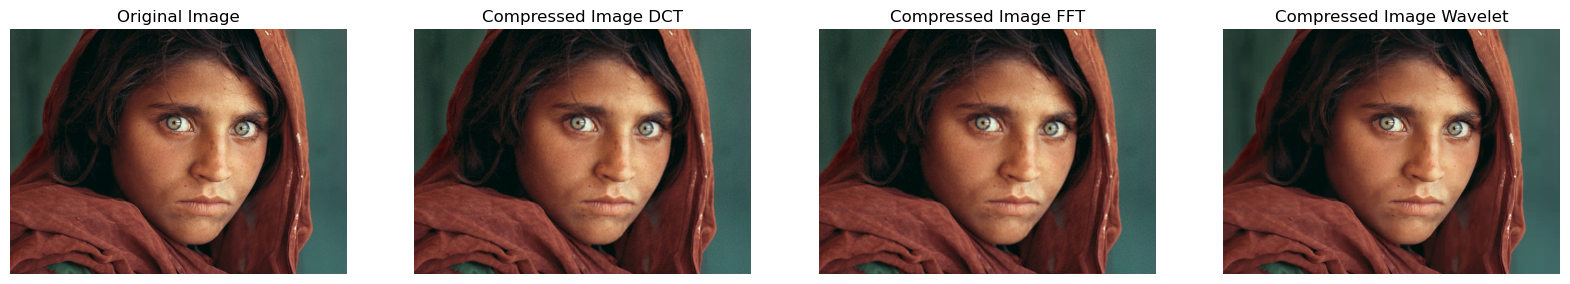

In [49]:
compressed_image_dct = dct_compression_rgb(img, threshold=0.1)
compressed_image_fft = fft_compression_rgb(img, threshold=0.1)
compressed_image_wavelet = wavelet_compression_rgb(img, threshold=0.1)

plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(compressed_image_dct.astype(np.uint8))
plt.title('Compressed Image DCT')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(compressed_image_fft.astype(np.uint8))
plt.title('Compressed Image FFT')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(compressed_image_wavelet.astype(np.uint8))
plt.title('Compressed Image Wavelet')
plt.axis('off')
plt.show()

save_compressed_image(compressed_image_dct, 'afghan_dct_compression.jpg' )
save_compressed_image(compressed_image_fft, 'afghan_fft_compression.jpg' )
save_compressed_image(compressed_image_wavelet, 'afghan_wavelet_compression.jpg' )